# Clustering Jerarquico para Recomendación de Compras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [33]:
os.chdir("./")
df = pd.read_excel("Amazon.xlsx").rename(columns = {"Unnamed: 0" : "Cliente"})
df

,Cliente,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43
...,...,...,...,...,...,...,...,...,...,...
95,Teofan,3,8,32,25,7,21,42,17,1
96,Teofil,305,25,46,24,33,28,355,26,45
97,Teofila,1,14,26,25,24,27,42,185,23
98,Teon,155,11,335,34,26,29,42,215,27


In [59]:
data = df.drop("Cliente", axis = 1)
nombre_clientes = df["Cliente"]
data

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,205,3,345,235,24,23,26,21,17
1,9,15,315,33,25,4,42,215,28
2,17,26,285,3,43,27,41,26,33
3,135,5,355,295,18,23,39,195,17
4,3,45,48,39,34,46,225,34,43
...,...,...,...,...,...,...,...,...,...
95,3,8,32,25,7,21,42,17,1
96,305,25,46,24,33,28,355,26,45
97,1,14,26,25,24,27,42,185,23
98,155,11,335,34,26,29,42,215,27


In [61]:
nombre_clientes = pd.DataFrame(nombre_clientes)
nombre_clientes

,Cliente
0,Adam
1,Anna
2,Bernard
3,Edward
4,Emilia
...,...
95,Teofan
96,Teofil
97,Teofila
98,Teon


In [49]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled

array([[0.43826336, 0.00641361, 0.73756517, 0.50239946, 0.05130888,
        0.04917101, 0.05558462, 0.04489527, 0.03634379],
       [0.02323527, 0.03872544, 0.81323434, 0.08519598, 0.06454241,
        0.01032679, 0.10843125, 0.55506471, 0.0722875 ],
       [0.05723452, 0.08753514, 0.95951982, 0.01010021, 0.14476966,
        0.09090188, 0.13803618, 0.08753514, 0.11110229],
       [0.25885639, 0.00958727, 0.68069644, 0.56564916, 0.03451419,
        0.04410146, 0.07478074, 0.37390368, 0.03259673],
       [0.01197502, 0.17962533, 0.19160036, 0.15567529, 0.13571692,
        0.18361701, 0.89812667, 0.13571692, 0.17164198],
       [0.14494006, 0.251738  , 0.60264551, 0.03661644, 0.03966781,
        0.02898801, 0.73995715, 0.03356507, 0.00457705],
       [0.04755854, 0.02481315, 0.98218723, 0.06823617, 0.07237169,
        0.09304932, 0.07857498, 0.05996511, 0.06410064],
       [0.13323393, 0.04304481, 0.06354234, 0.52268696, 0.05739308,
        0.04509456, 0.70716471, 0.44069685, 0.05944283],


In [63]:
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344
1,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287
2,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102
3,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597
4,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642
...,...,...,...,...,...,...,...,...,...
95,0.045932,0.122484,0.489936,0.382763,0.107174,0.321521,0.643041,0.260279,0.015311
96,0.640241,0.052479,0.096561,0.050380,0.069272,0.058776,0.745198,0.054578,0.094462
97,0.005043,0.070602,0.131118,0.126075,0.121032,0.136161,0.211805,0.932952,0.115989
98,0.357707,0.025386,0.773109,0.078465,0.060003,0.066926,0.096927,0.496175,0.062310


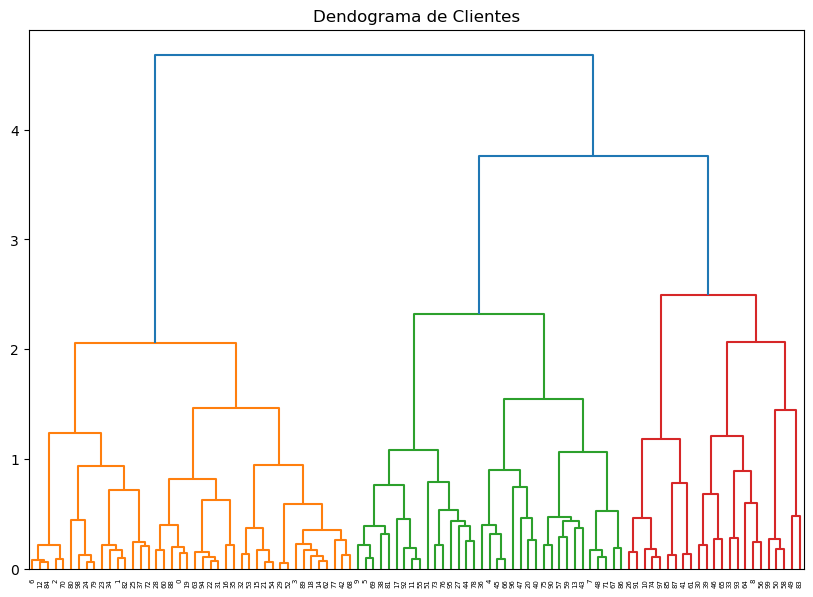

In [65]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
plt.title("Dendograma de Clientes")
dend = shc.dendrogram(shc.linkage(data_scaled, method = "ward"))

In [67]:
colores_unicos = set(dend['color_list'])
colores_unicos

{'C0', 'C1', 'C2', 'C3'}

In [69]:
num_clusters_optimo = len(colores_unicos) - 1
num_clusters_optimo

3

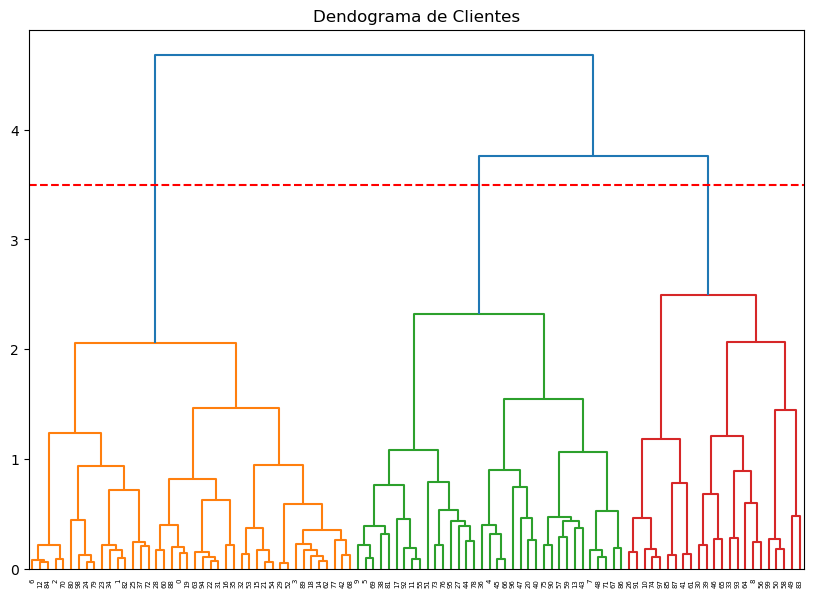

In [73]:
plt.figure(figsize = (10, 7))
plt.title("Dendograma de Clientes")
dend = shc.dendrogram(shc.linkage(data_scaled, method = "ward"))
plt.axhline(y = 3.5, color = 'r', linestyle = '--')

In [81]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, metric = "euclidean", linkage = 'ward')
grupos = cluster.fit_predict(data_scaled)
grupos

array([1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0])

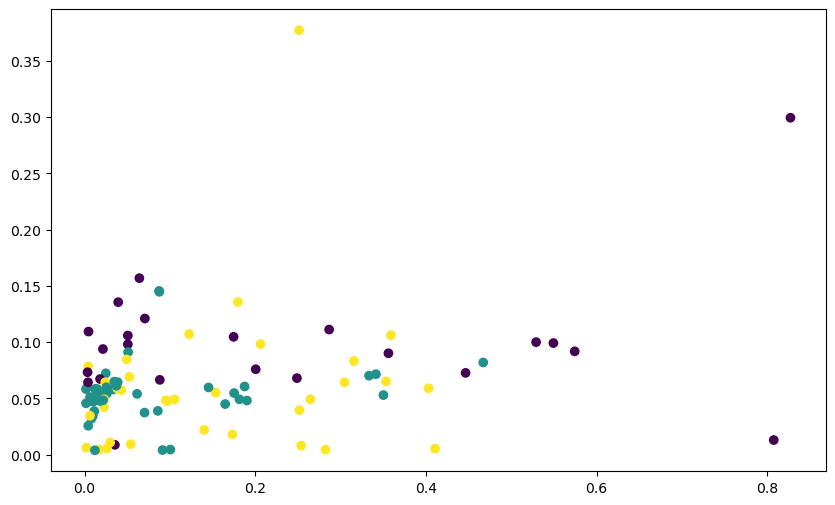

In [85]:
plt.figure(figsize = (10,6))
plt.scatter(data_scaled["Precio"], data_scaled["Valor Educativo"], c = cluster.labels_)

In [87]:
# Separación mediante PCA
campos = data_scaled.values
campos

array([[0.43826336, 0.00641361, 0.73756517, 0.50239946, 0.05130888,
        0.04917101, 0.05558462, 0.04489527, 0.03634379],
       [0.02323527, 0.03872544, 0.81323434, 0.08519598, 0.06454241,
        0.01032679, 0.10843125, 0.55506471, 0.0722875 ],
       [0.05723452, 0.08753514, 0.95951982, 0.01010021, 0.14476966,
        0.09090188, 0.13803618, 0.08753514, 0.11110229],
       [0.25885639, 0.00958727, 0.68069644, 0.56564916, 0.03451419,
        0.04410146, 0.07478074, 0.37390368, 0.03259673],
       [0.01197502, 0.17962533, 0.19160036, 0.15567529, 0.13571692,
        0.18361701, 0.89812667, 0.13571692, 0.17164198],
       [0.14494006, 0.251738  , 0.60264551, 0.03661644, 0.03966781,
        0.02898801, 0.73995715, 0.03356507, 0.00457705],
       [0.04755854, 0.02481315, 0.98218723, 0.06823617, 0.07237169,
        0.09304932, 0.07857498, 0.05996511, 0.06410064],
       [0.13323393, 0.04304481, 0.06354234, 0.52268696, 0.05739308,
        0.04509456, 0.70716471, 0.44069685, 0.05944283],


In [89]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 3)
pca.fit(campos)
campos = pca.transform(campos)
campos

array([[-3.99932192e-01,  6.03537400e-02,  3.08750371e-01],
       [-4.08295827e-01, -6.40226779e-02, -3.53027286e-01],
       [-4.97031821e-01, -3.59552855e-01, -9.40216656e-02],
       [-3.39966748e-01,  1.84345010e-01,  1.27988393e-01],
       [ 5.82077513e-01, -3.87976527e-01, -6.58011832e-03],
       [ 1.72340300e-01, -5.29625728e-01, -2.96601908e-02],
       [-5.65284415e-01, -3.37705848e-01, -3.12289829e-02],
       [ 5.33588699e-01,  6.99471189e-02,  6.33716538e-02],
       [ 9.98160432e-02,  4.71657434e-01,  4.09500800e-01],
       [ 2.21952075e-01, -5.65033132e-01, -6.35318435e-02],
       [ 8.27400513e-02,  3.97127124e-01, -5.86872768e-01],
       [-1.43464946e-03, -4.89365835e-01, -3.45310963e-02],
       [-5.72920388e-01, -3.59277741e-01, -4.19707314e-02],
       [ 5.13506392e-01,  1.30131187e-02,  3.77397362e-01],
       [-3.52721625e-01,  2.06397282e-01,  3.18852234e-02],
       [-4.68862596e-01,  1.68001041e-02, -1.75955241e-02],
       [-2.51424882e-01,  4.59901894e-02

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


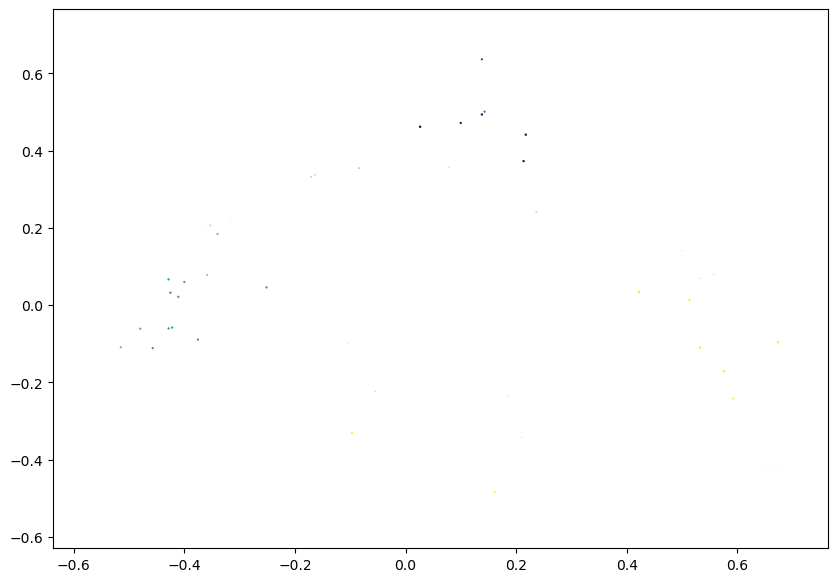

In [117]:
plt.figure(figsize = (10,7)) # ScatterPlot es de dos dimensiones. Por lo que no es posible visualizar de manera correcta los tres grupos
plt.scatter(campos[:,0], campos[:,1], campos[:,2], c = cluster.labels_)

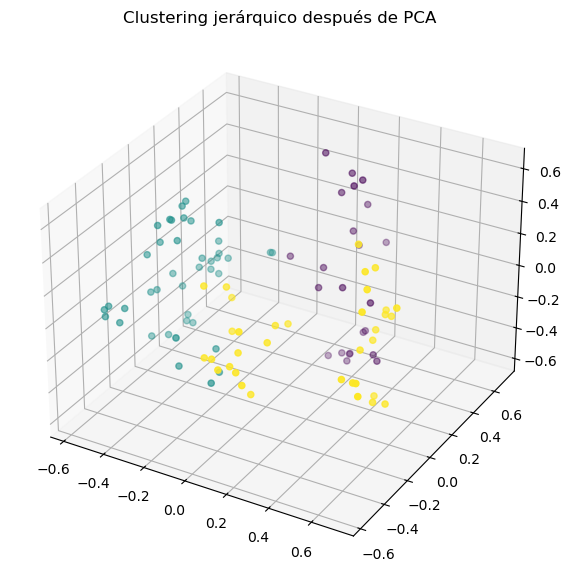

In [119]:
from mpl_toolkits.mplot3d import Axes3D  # ScatterPlot en 3D
fig = plt.figure(figsize = (10,7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(campos[:, 0], campos[:, 1], campos[:, 2], c=cluster.labels_)
plt.title('Clustering jerárquico después de PCA')
plt.show()

In [121]:
grupos_df = pd.DataFrame(grupos, columns= ["Grupo"])
grupos_df

,Grupo
0,1
1,1
2,1
3,1
4,2
...,...
95,2
96,2
97,0
98,1


In [139]:
df_etiquetado = pd.concat([nombre_clientes, data, grupos_df], axis = 1, join = "inner")
df_etiquetado = df_etiquetado.set_index("Cliente")
df_etiquetado

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
Cliente,,,,,,,,,,
Adam,205,3,345,235,24,23,26,21,17,1
Anna,9,15,315,33,25,4,42,215,28,1
Bernard,17,26,285,3,43,27,41,26,33,1
Edward,135,5,355,295,18,23,39,195,17,1
Emilia,3,45,48,39,34,46,225,34,43,2
...,...,...,...,...,...,...,...,...,...,...
Teofan,3,8,32,25,7,21,42,17,1,2
Teofil,305,25,46,24,33,28,355,26,45,2
Teofila,1,14,26,25,24,27,42,185,23,0


In [147]:
df_etiquetado.loc[["Salome", "Stephania", "Lydia"]]

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
Cliente,,,,,,,,,,
Salome,17,23,275,41,4,44,315,28,32,2
Stephania,215,125,465,315,34,4,37,305,45,1
Lydia,19,4,435,145,16,21,28,185,24,1


In [155]:
df_grupo2 = df_etiquetado.loc[df_etiquetado["Grupo"] == 2]
df_grupo2.head()

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
Cliente,,,,,,,,,,
Emilia,3,45,48,39,34,46,225,34,43,2
Fabian,95,165,395,24,26,19,485,22,3,2
Frank,65,21,31,255,28,22,345,215,29,2
Gabriel,2,175,325,3,37,32,435,27,39,2
Henry,195,11,455,23,3,25,415,25,32,2


In [153]:
df_grupo1 = df_etiquetado.loc[df_etiquetado["Grupo"] == 1]
df_grupo1.head()

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
Cliente,,,,,,,,,,
Adam,205,3,345,235,24,23,26,21,17,1
Anna,9,15,315,33,25,4,42,215,28,1
Bernard,17,26,285,3,43,27,41,26,33,1
Edward,135,5,355,295,18,23,39,195,17,1
Philip,23,12,475,33,35,45,38,29,31,1
